# Import

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor

sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 14})

# Data

In [2]:
n = 10000
X, y = make_regression(n_samples=n, n_features=1, n_informative=1, n_targets=1)
X = X.flatten() + np.random.normal(loc=6, scale=0.5, size=n)
y = y + np.random.normal(loc=300, scale=40, size=n)

Text(0, 0.5, 'Rating')

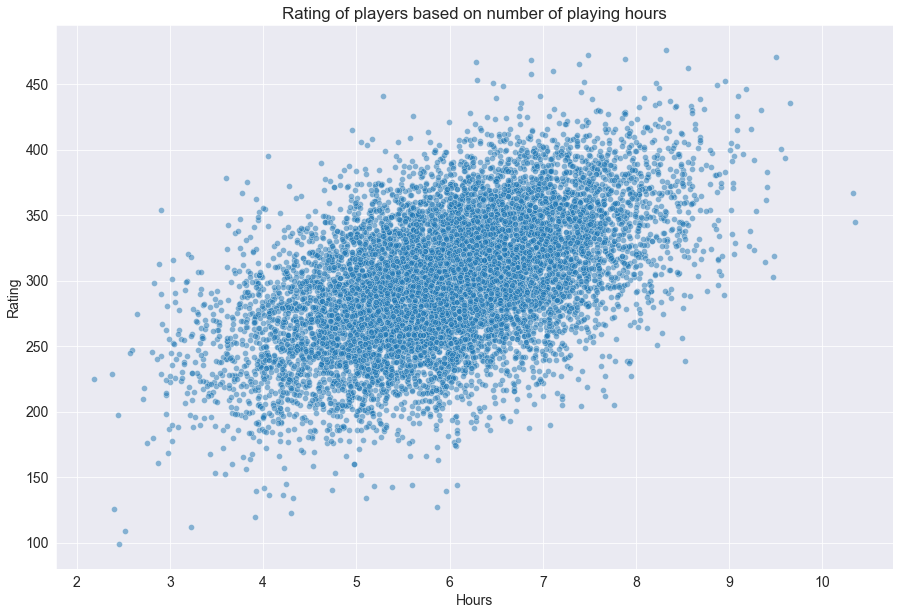

In [3]:
df = pd.DataFrame({'hours': X.flatten(), 'rating': y})
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='hours', y='rating', alpha=0.5)
plt.title('Rating of players based on number of playing hours')
plt.xlabel('Hours')
plt.ylabel('Rating')

In [4]:
df_train, df_test = train_test_split(df, test_size=0.20, shuffle=False)
X_train, y_train = df_train[['hours']], df_train['rating']
X_test, y_test = df_test[['hours']], df_test['rating']

# Model

In [5]:
models = {}
df_pred = df_test.copy()
for alpha in [0.2, 0.5, 0.8]:
    model = LGBMRegressor(objective='quantile', alpha=alpha)
    model.fit(X_train, y_train)
    df_pred[str(alpha)] = model.predict(X_test)

# Predictions Visualisation

Text(0.5, 0, 'Hours')

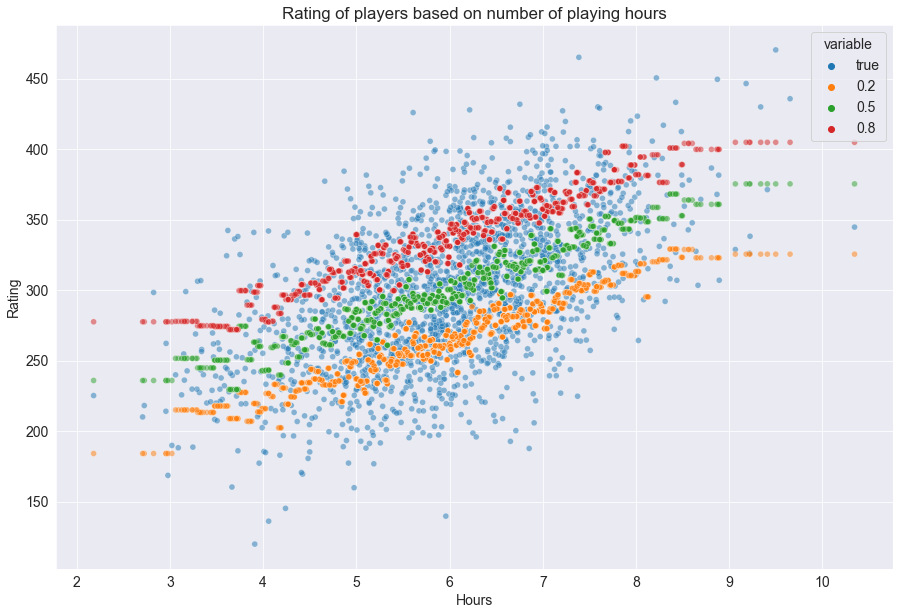

In [6]:
plt.figure(figsize=(15, 10))
df_pred_melted = pd.melt(df_pred.rename(columns={'rating': 'true'}), id_vars=['hours'])
sns.scatterplot(data=df_pred_melted, x='hours', y='value', hue='variable', hue_order=['true', '0.2', '0.5', '0.8'], alpha=0.5)
plt.title('Rating of players based on number of playing hours')
plt.ylabel('Rating')
plt.xlabel('Hours')

In [7]:
for alpha in [0.2, 0.5, 0.8]:
    statistics = (df_pred[str(alpha)] > df_pred['rating']).value_counts(normalize=True)
    true_percentage, false_percentage = statistics[True], statistics[False]
    print(f"Predictions for alpha = {alpha} are greater than true values in {true_percentage * 100} % of cases and less or equal in {false_percentage * 100} % of cases.")

Predictions for alpha = 0.2 are greater than true values in 21.05 % of cases and less or equal in 78.95 % of cases.
Predictions for alpha = 0.5 are greater than true values in 50.5 % of cases and less or equal in 49.5 % of cases.
Predictions for alpha = 0.8 are greater than true values in 79.55 % of cases and less or equal in 20.45 % of cases.
